In [4]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = cv2.imread('Include/prototype_test/28_31.jpeg')

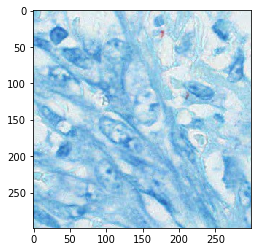

In [50]:
def show_img(img):
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img1 = Image.fromarray(img1)
    plt.imshow(img1)
    plt.show()
    
def show_img1(img):
    img = (img*64).astype(np.uint8)
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img1 = Image.fromarray(img1)
    plt.imshow(img1)
    plt.show()    
def show_img2(img):
    img1 = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    img1 = Image.fromarray(img1)
    plt.imshow(img1)
    plt.show()      
show_img(img)

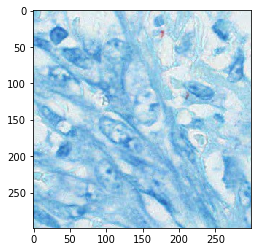

In [33]:
#img2 = img[0:3,0:3]
img2 = img
show_img(img2)

In [38]:
img3 = (img2/64).astype(int)

In [29]:
img2.shape, img3.shape

((299, 299, 3), (299, 299, 3))

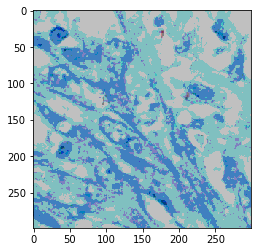

In [40]:
show_img1(img3)

In [58]:
#img4 = img3[0:3,0:3]
img4 = img3

In [96]:
img_mask = img4[:,:,2]>=3 
img_mask2 = img4[:,:,1]<=2
img_mask3 = img4[:,:,0]<=2
t1 = np.logical_and(img_mask,img_mask2)
t2 = np.logical_and(t1,img_mask3)
print(img_mask.shape)

(299, 299)


In [48]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

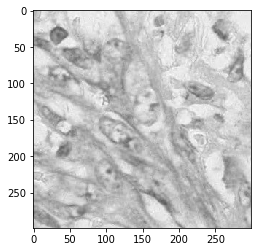

In [51]:
show_img2(gray_img)

In [52]:
gray_small = gray_img[0:3,0:3]
gray_small

array([[196, 193, 188],
       [201, 193, 186],
       [197, 186, 181]], dtype=uint8)

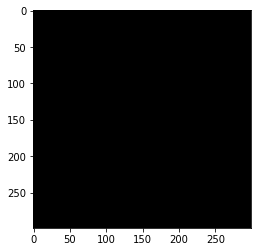

(299, 299, 1)


In [97]:
h,w,d = img.shape
white_img = np.zeros((h,w,1), np.uint8)
show_img2(white_img)
print(white_img.shape)

In [80]:
#img6 = np.where(gray_small,img_mask,255)
img6 = np.where(white_img,img_mask,255)
img6 = img6.astype(np.uint8)
img7 = cv2.bitwise_not(img6)
#show_img2(img6)
print(img6.shape, img7.shape, type(img7))
#img6


(299, 299, 299) (299, 299, 299) <class 'numpy.ndarray'>


In [98]:
white_img[t2]=255

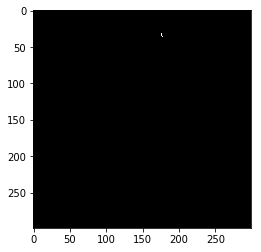

In [99]:
show_img2(white_img)

In [101]:
cv2.findNonZero(white_img)

array([[[176,  31]],

       [[176,  32]],

       [[179,  32]],

       [[175,  33]],

       [[176,  33]],

       [[176,  34]],

       [[176,  35]],

       [[178,  35]],

       [[177,  36]],

       [[175,  37]]], dtype=int32)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret, labels, centers = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
centers = np.uint8(centers)
res = centers[labels.flatten()]
res2 = res.reshape((img.shape))

In [ ]:
cv2.imshow('res2', res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img_name = '28_31'
cv2.imwrite('Q16_' + img_name, res2, CV_IMWRITE_JPEG_QUALITY)